# Aykiri Gozlem Analizi
## Aykiri degerleri yakalamak:

In [4]:
import seaborn as sns

In [5]:
df=sns.load_dataset('diamonds') #diamonds isimli veri setini seaborn kutuphanesinden cektik.
df=df.select_dtypes(include=['float64','int64']) #Sadece icerisindeki sayisal degerlere erismek icin bir tip secimi yaptik.
df=df.dropna() #Veri setindeki eksik degerleri silerek, disarida birakiyoruz ve son dataframe'imizi olusturduk.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [6]:
#degiskenlerden bir tanesini secip bunun uzerinde calismalarimizi surdurelim.
df_table=df["table"] #dataframe'in icinden table degiskenini seciyorum. Bunu df_table olarak isimlendiriyorum.

In [7]:
df_table.head() #df_table'i bir gozlemleyelim dogru mu diye.

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

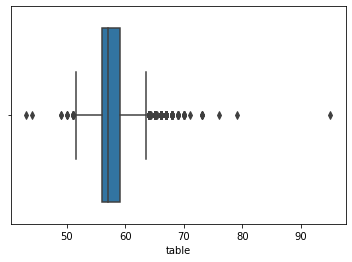

In [8]:
sns.boxplot(x=df_table); #df_table degiskenini kutu grafik yaklasimi ile gorsellestirelim.

In [9]:
#Bir esik deger belirleyelim: Burada boxplot yontemi ile esik deger belirleme yontemi kullanacagiz.
Q1=df_table.quantile(0.25) #degiskenin kucukten buyuge siralandiginda %25. indexine karsilik gelen degeri alicak Q1. ilk ceyrek.
Q3=df_table.quantile(0.75) #3. ceyrek.
IQR=Q3-Q1

In [10]:
Q1 #q1'i bir gozlemleyelim. Bu deger sekilde mavinin baslangic noktasini gosteriyor aslinda.

56.0

In [11]:
Q3 #q3'u bir gozlemleyelim. Bu deger sekilde mavinin bitis noktasini gosteriyor aslinda.

59.0

In [12]:
IQR

3.0

In [13]:
#esik deger hesaplama islemi yapalim:
alt_sinir=Q1-1.5*IQR #Q1 degerinden 1.5*IQR kadar asagisini alt sinir olarak belirle.
ust_sinir=Q3+1.5*IQR

In [14]:
alt_sinir #alt_sinir'i bir gozlemleyelim. Bu deger sekilde 1.siyah cizgiye denk gelir.

51.5

In [15]:
ust_sinir #ust_sinir'i bir gozlemleyelim. Bu deger sekilde sondaki siyah cizgiye denk gelir.

63.5

In [16]:
#Aykiri gozlem sorgulamasi yapalim.
(df_table<alt_sinir) | (df_table>ust_sinir) #alt_sinirdan kucuk olanlara veya ust_sinirdan buyuk olanlara(aykiri) true diyecek.

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [17]:
#aykiri degerleri true-false olarak gorduk. Bir de bu aykiri degerlerin kendilerine erismek istedigimizi dusunelim.
aykiri_tf=(df_table<alt_sinir) | (df_table>ust_sinir)
df_table[aykiri_tf] #aykiri_true-false'da true olanların degerlerini goster. index degerleri ile birlikte gorebiliriz.

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [18]:
df_table[aykiri_tf].index #sadece indexlerine erismek istersek.

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

## Aykiri deger problemini cozmek:

In [19]:
#Elimizde daha onceden tanimladigimiz aykiri degerlerimiz zaten vardi:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

Aykiri degerleri cozmek icin 3 yontem vardir:
1-Silme yontemi
2-Ortalama yontemi
3-Baskilama yontemi

### yontem1: Silme: aykiri degerler silinerek calismanin disinda birakilabilir.

In [20]:
import pandas as pd

In [22]:
#once df_table'in tipini sorgulayalim:
type(df_table) #tipi pandas serisi formunda,

pandas.core.series.Series

In [35]:
df_table=pd.DataFrame(df_table) #bunu pandas dataframe'e cevirelim.

In [36]:
df_table.shape #53940 tane gozlem degeri var

(53940, 1)

In [43]:
#aykiri olmayan degerlere erismeye calisalim:
t_df = df_table[~((df_table<(alt_sinir))|(df_table>(ust_sinir))).any(axis=1)]
#kosulun disindakileri, kosulu saglamayanlari getir.
#alt_sinir'dan asagida olanlari ve ust_sinir'dan yukarida olanlarin disindakileri getir.
#axis1 sütün bazinda islem yapmak istedigimi belirttim.

In [44]:
t_df.shape

(53335, 1)

### yontem2: Ortalama ile doldurma: aykiri degerler, ortalama deger ile degistirilir.

In [56]:
#veri setimizi tekrar olusturalim ve df_table olarak kaydedelim:
import seaborn as sns
df=sns.load_dataset('diamonds') #diamonds isimli veri setini seaborn kutuphanesinden cektik.
df=df.select_dtypes(include=['float64','int64']) #Sadece icerisindeki sayisal degerlere erismek icin bir tip secimi yaptik.
df=df.dropna() #Veri setindeki eksik degerleri silerek, disarida birakiyoruz ve son dataframe'imizi olusturduk.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [57]:
#degiskenlerden bir tanesini secip bunun uzerinde calismalarimizi surdurelim.
df_table=df["table"] #dataframe'in icinden table degiskenini seciyorum. Bunu df_table olarak isimlendiriyorum.

In [58]:
aykiri_tf.head() #aykiri_tf daha onceden belirlemistik ztn, bunu yine kullanabiliriz.

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [59]:
df_table[aykiri_tf] #aykirilari yakalayalim.

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [60]:
df_table.mean() #ortalamaya bakalim.

57.45718390804603

In [61]:
df_table[aykiri_tf] = df_table.mean() #yakalanan aykiri degerlerin yerine ortalama degeri ata. not:uyariyi gormezden gel.

C:\Users\irema\AppData\Local\Temp/ipykernel_10044/3369307138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean() #yakalanan aykiri degerlerin yerine ortalama degeri ata. not:uyariyi gormezden gel.


In [62]:
df_table[aykiri_tf] #aykiri degerlerde degisim oldu mu gozlemleyelim.Tum degerler ortalama deger alarak degisti.

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

### yontem3: Baskilama Yontemi: aykiri degerler, sinir degerlere baskilanir. 

Ust aykiri degerler ust sinira, alt aykiri degerler alt sinira baskilanir. Boylece aykiri degerlerin veri setini asagi ya da yukari cekme cabasi goz onunde bulundurulmus olur.

In [65]:
#veri setimizi tekrar olusturalim ve df_table olarak kaydedelim:
import seaborn as sns
df=sns.load_dataset('diamonds') #diamonds isimli veri setini seaborn kutuphanesinden cektik.
df=df.select_dtypes(include=['float64','int64']) #Sadece icerisindeki sayisal degerlere erismek icin bir tip secimi yaptik.
df=df.dropna() #Veri setindeki eksik degerleri silerek, disarida birakiyoruz ve son dataframe'imizi olusturduk.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [66]:
#degiskenlerden bir tanesini secip bunun uzerinde calismalarimizi surdurelim.
df_table=df["table"] #dataframe'in icinden table degiskenini seciyorum. Bunu df_table olarak isimlendiriyorum.

In [69]:
alt_sinir

51.5

In [70]:
alt_aykiri_tf=(df_table<alt_sinir) #alt aykirilari yakalayalim.

In [71]:
df_table[alt_aykiri_tf] = alt_sinir #alt aykirilari, alt sinir degere baskilayalim.

C:\Users\irema\AppData\Local\Temp/ipykernel_10044/47181625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[alt_aykiri_tf] = alt_sinir #alt aykirilari, alt sinir degere baskilayalim.


In [72]:
df_table[alt_aykiri_tf] #alt aykiri degerler degismis mi gozlemleyelim.

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64